### Database : données RH à propos de l'emploi de Data Scientist 

Libraries importantes :

In [1]:
import pandas as pd
import numpy as np 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

Importation database : data

In [2]:
data = pd.read_csv('/Users/florinepritzy/Documents/test/donnees_exo2.csv', sep=',')

In [3]:
data
SEED = 42
data.shape
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

On remarque 4 variables numériques et 10 variables qualitatives 

## Partie 1 : Nettoyage des données 

#### a) Regarde toute l'information manquante : on a que des valeurs manquantes standarts donc aucune transformation nécessaire

In [4]:
for var in data.columns:
    print(var, data[var].unique(), '\n')

enrollee_id [ 8949 29725 11561 ... 24576  5756 23834] 

city ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' '

#### b) Regarde l'information manquante : supprime les variables avec plus de 50% de NaN et les variables qui n'apportent pas d'information supplémentaire 

In [5]:
for var in data.columns:
    print(var, 'percent of missing values', data[var].isnull().mean().round(3)>0.5)

enrollee_id percent of missing values False
city percent of missing values False
city_development_index percent of missing values False
gender percent of missing values False
relevent_experience percent of missing values False
enrolled_university percent of missing values False
education_level percent of missing values False
major_discipline percent of missing values False
experience percent of missing values False
company_size percent of missing values False
company_type percent of missing values False
last_new_job percent of missing values False
training_hours percent of missing values False
target percent of missing values False


In [6]:
for var in data.columns:
    print(var, data[var].nunique(), len(data))

enrollee_id 19158 19158
city 123 19158
city_development_index 93 19158
gender 3 19158
relevent_experience 2 19158
enrolled_university 3 19158
education_level 5 19158
major_discipline 6 19158
experience 22 19158
company_size 8 19158
company_type 6 19158
last_new_job 6 19158
training_hours 241 19158
target 2 19158


#### 1 variable apparaît : enrollee_id : pas de valeurs analytique

In [7]:
data.drop('enrollee_id', axis = 1, inplace = True)

#### c) Traitement des missing values : 

Important de comprendre pourquoi ce sont des missing values car la manière de les traiter n'est pas la même
- MCAR (Missing Completly At Random) : la probabilité que la valeur soit manquante est indépendante des autres variables
- MAR (Missing At Random) : la probabilité qu’une valeur soit manquante est corrélée à l’existence de variables explicatives dont les valeurs sont renseignées. 
- MNAR (Missing Not At Random) : dans ce cas l’absence d’une donnée est motivée par une cause que nous avons interêt à comprendre pour mieux traiter ces données absentes. Nous ne pouvons pas l'ignorer


Pourcentage de missing values : 

In [8]:
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

gender 0.23530639941538783
enrolled_university 0.020148240943731077
education_level 0.02401085708320284
major_discipline 0.1468316108153252
experience 0.0033928385008873576
company_size 0.3099488464349097
company_type 0.32049274454535964
last_new_job 0.02207954901346696


#### Variables avec plus de 10% de valeurs manquantes : gender, major_discipline, company size et company type

Variable gender : 

24% d'individus n'ont pas d'informations concernant leur sexe. Cette variable est importante, nous ne pouvons donc pas la supprimer. Nous constatons que cette variable est fortement déséquilibrée avec 90% d'hommes et 8% de femmes. Les femmes sont sous représentées dans ce secteur

In [9]:
data["gender"].value_counts(normalize=True)

Male      0.902457
Female    0.084505
Other     0.013038
Name: gender, dtype: float64

In [10]:
data[data['gender'].isnull()][data[data['gender'].isnull()]['major_discipline'].isnull()].head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
10,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
14,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,never,26,0.0
25,city_67,0.855,NaN,No relevent experience,no_enrollment,High School,NaN,4,NaN,NaN,never,22,0.0
64,city_11,0.550,NaN,No relevent experience,Full time course,High School,NaN,3,NaN,NaN,NaN,98,0.0
69,city_90,0.698,NaN,No relevent experience,NaN,NaN,NaN,2,NaN,Pvt Ltd,never,228,1.0


In [11]:
data2 = data.copy()
data = data.dropna(subset=["gender"], axis=0, how='any').reset_index(drop=True)

Pour ne pas modifier la distribution de notre database, nous allons supprimer les observations manquantes. Nous ne pouvons pas remplacer ces missings values par la modalité Other, qui modifierait trop notre variable d'origine. On constate également que ces informations sont aussi manquantes pour la variable major_discipline ou company_size par exemple
- Database sans les observations manquantes du genre : "data" : 14650 observations 
- Database d'origine, sans transformation : data2 


In [12]:
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

enrolled_university 0.01453924914675768
education_level 0.017679180887372015
major_discipline 0.13501706484641637
experience 0.0010921501706484642
company_size 0.29440273037542664
company_type 0.3025938566552901
last_new_job 0.005051194539249146


Variables company_size et company_type :

In [13]:
print(data[["company_size", "company_type"]].isnull().sum())

company_size    4313
company_type    4433
dtype: int64


In [14]:
data_company = data[["company_size", "company_type"]].copy()

data_company.set_index("company_type").isna().sum(level=0) 
#seulement 426 entreprises qui n'ont pas renseigné "company_size", ont renseigné "company_type"

,company_size
company_type,
Pvt Ltd,301
Funded Startup,3
Early Stage Startup,1
Other,6
Public Sector,94
NGO,21


In [15]:
data_company.set_index("company_size").isna().sum(level=0)
#seulement 546 entreprises qui n'ont pas renseigné "company_type", ont renseigné "company_size"

,company_type
company_size,
50-99,167
<10,42
5000-9999,26
1000-4999,41
10/49,70
100-500,106
10000+,48
500-999,46


Pour ces 2 variables : la plupart du temps, quand les informations sont manquantes, les données sur le type de l'entreprise et la taille de l'entreprise ne sont pas renseignées. 

De plus, plus de 20% de valeurs manquantes, paraît trop important pour ajouter des informations, cela modifierait trop la distribution de nos données. 
Il faut soit supprimer ces 2 variables, soit supprimer les observations manquantes. Je décide de les supprimer mais créer aussi une nouvelle database sans les observations manquantes, pour la partie 2

- Database sans les 2 variables : "data" 
- Database avec les 2 variables : "data3"

In [16]:
data3= data.copy()
data.drop(["company_type", "company_size"], axis=1, inplace=True) 

In [17]:
data3 = data3.dropna(subset=["company_type", "company_size"], axis=0, how='any').reset_index(drop=True)

Variable "Major discipline" : suppression des valeurs manquantes 

In [18]:
data["major_discipline"].value_counts(normalize=True)

STEM               0.882891
Humanities         0.043797
Other              0.022885
Business Degree    0.020044
Arts               0.016020
No Major           0.014362
Name: major_discipline, dtype: float64

In [19]:
data = data.dropna(subset=["major_discipline"], axis=0, how='any').reset_index(drop=True)

La database "data" contient maintenant environ 12 672 observations

#### Variables avec moins de 10% de valeurs manquantes : last_new_job, experience, enrolled_university et education level

Variable "last_new_job" :

In [20]:
data["last_new_job"].value_counts(normalize=True)

1        0.432863
>4       0.202838
2        0.165425
never    0.076094
3        0.061509
4        0.061271
Name: last_new_job, dtype: float64

In [21]:
print(data[["last_new_job"]].isnull().sum())

last_new_job    56
dtype: int64


Variable "experience" :

In [22]:
data["experience"].value_counts(normalize=True)

>20    0.209400
5      0.067141
4      0.060269
6      0.059716
10     0.057188
9      0.054739
3      0.054660
7      0.054107
8      0.041943
2      0.041548
15     0.040995
11     0.039021
14     0.034044
16     0.030727
12     0.029700
13     0.024013
17     0.021722
1      0.018562
19     0.018483
18     0.017299
<1     0.015561
20     0.009163
Name: experience, dtype: float64

In [23]:
data["experience"].isnull().sum()

12

Nous allons remplacer les NaN par le mode de ces variables : la modalité la plus importante. Cela ne concerne que 68 individus, mais nous vérifierons la distribution de nos variables

In [24]:
var_with_null = pd.DataFrame(data[["experience","last_new_job"]])

In [25]:
#imputation par le mode: 
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
var_with_null_cat=pd.DataFrame(imp.fit_transform(var_with_null))
var_with_null_cat.columns=var_with_null.columns
var_with_null_cat.index=var_with_null.index

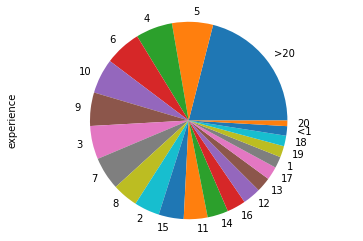

In [26]:
# Diagramme en secteurs : après imputation 
var_with_null_cat["experience"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show() # Affiche le graphique

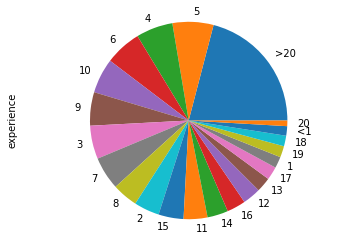

In [27]:
#Diagramme en secteurs : avant imputation 
data["experience"].value_counts(normalize=False).plot(kind='pie')
plt.axis('equal') 
plt.show() 

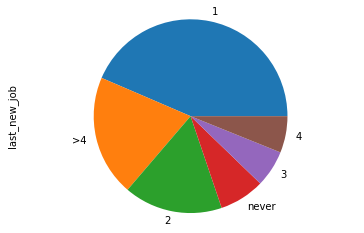

In [28]:
# Diagramme en secteurs : après imputation 
var_with_null_cat["last_new_job"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show() 

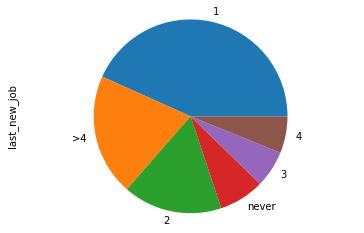

In [29]:
# Diagramme en secteurs : avant imputation 
data["last_new_job"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

In [30]:
data.last_new_job.value_counts(normalize=True)*100

1        43.286303
>4       20.283767
2        16.542486
never     7.609385
3         6.150919
4         6.127140
Name: last_new_job, dtype: float64

In [31]:
var_with_null_cat.last_new_job.value_counts(normalize=True)*100

1        43.536932
>4       20.194129
2        16.469381
never     7.575758
3         6.123737
4         6.100063
Name: last_new_job, dtype: float64

In [32]:
data[["last_new_job","experience"]]=var_with_null_cat[["last_new_job","experience"]]

Variables "enrolled_university":

In [33]:
data["enrolled_university"].value_counts(normalize=True)

no_enrollment       0.791291
Full time course    0.149932
Part time course    0.058777
Name: enrolled_university, dtype: float64

In [34]:
print(data[["enrolled_university"]].isnull().sum())

enrolled_university    133
dtype: int64


Pour cette variable, une nouvelle catégorie va être créer : "other", afin de transformer ces missings values 

In [35]:
data["enrolled_university"].fillna("other", inplace = True)

### Vérification :

In [36]:
# Nombre total de valeurs manquantes
print(data.isnull().sum().sum())

0


#### d) Traitement des valeurs extrêmes :

Text(0, 0.5, 'training_hours')

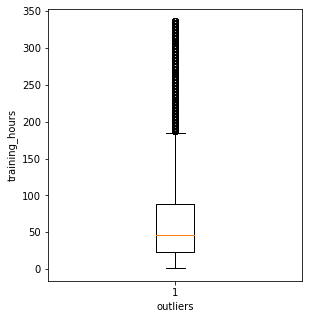

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(data["training_hours"])
plt.xlabel('outliers')
plt.ylabel("training_hours")

On peut en déduire que le nombre d'heures utilisées pour former un candidat ne contribue pas beaucoup à la décision du candidat, de changer de travail. 
Nous pouvons également constater que la durée moyenne du cours dispensé aux candidats est de 46-48 heures. Il n'y a pas de valeurs abbérantes. 

Text(0, 0.5, 'city_development_index')

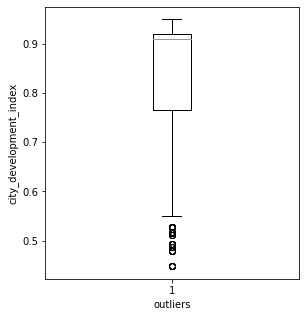

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(data["city_development_index"])
plt.xlabel('outliers')
plt.ylabel("city_development_index")

In [39]:
def find_boundaries(data, variable):
# calculate the boundaries anything outside the upper and lower boundaries is an outlier
    limite_sup = data[variable].mean() + 3 * data[variable].std()
    limite_inf = data[variable].mean() - 3 * data[variable].std()
    return limite_sup, limite_inf
limite_sup, limite_inf = find_boundaries(data, 'city_development_index')
limite_sup, limite_inf 

(1.1925422771668837, 0.4866988844492869)

In [40]:
print('Nous avons {} valeurs abbérantes de la limite supérieure:'.format(len(data[data['city_development_index'] > limite_sup])))
print('Nous avons {} valeurs abbérantes de la limite inférieure:'.format(len(data[data['city_development_index'] < limite_inf])))

Nous avons 0 valeurs abbérantes de la limite supérieure:
Nous avons 12 valeurs abbérantes de la limite inférieure:


Il y a 12 villes qui sont considérés comme valeurs abbérantes dans la limite inférieure. Ces villes ont un index de développement très faibles: ce qui peut se traduire par l'envie du candidat de vouloir changer de travail, pour pouvoir changer de ville. Cela peut également signifier que si l'indice de développement des villes est supérieur à environ 0,8, il y a plus de chances que les candidats ne changent pas d'emploi.

#### e) Target variable : Unbalanced target variable

In [41]:
data["target"].value_counts(normalize=True)*100

0.0    76.010101
1.0    23.989899
Name: target, dtype: float64

## Partie 2 : Statistiques descriptives 

#### a) Répartition des heures d'apprentissage 

In [42]:
data.describe()

,city_development_index,training_hours,target
count,12672.000000,12672.000000,12672.000000
mean,0.839621,65.009628,0.239899
std,0.117641,59.817088,0.427038
min,0.448000,1.000000,0.000000
25%,0.766000,23.000000,0.000000
50%,0.910000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


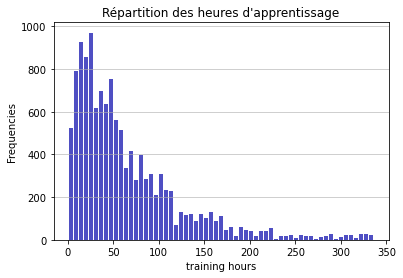

In [43]:
n, bins, patches = plt.hist(data["training_hours"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('training hours')
plt.ylabel('Frequencies')
plt.title("Répartition des heures d'apprentissage")
maxfreq = n.max()

Candidats : 

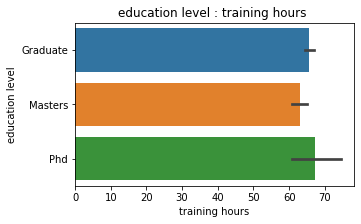

In [44]:
et = data.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(5,3))
sns.barplot(y=data.education_level, x=data.training_hours)
plt.xticks()
plt.xlabel('training hours')
plt.ylabel('education level')
plt.title('education level : training hours ')
plt.show()

Entreprises :

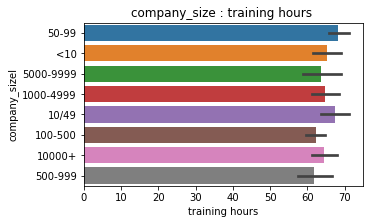

In [45]:
et = data3.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(5,3))
sns.barplot(y=data3.company_size, x=data3.training_hours)
plt.xticks()
plt.xlabel('training hours')
plt.ylabel('company_sizel')
plt.title('company_size : training hours ')
plt.show()

On constate que la majorité des candidats recoivent entre 23 et 88 heures d'apprentissage. La moyenne est autour de 65h. Si on s'intéresse aux types de candidats qui sont le plus formés, on constate que ce sont ceux qui ont un PHD qui ont le plus d'heures d'apprentissage en moyenne. Concernant les entreprises, ce ne sont pas les plus grandes qui accordent le plus d'heures pour former un candidat mais les PME (10-49 et 50-99). 

#### b) Le nombre de femmes ayant une expérience d’au moins 5 ans et vivant dans une ville avec un indice de développement d’au moins 0.9

In [46]:
stats = pd.DataFrame(data[data['gender']== 'Female'].reset_index(drop=True))
stats #new dataframe avec seulement les femmes 

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,city_13,0.827,Female,Has relevent experience,no_enrollment,Graduate,Arts,4,1,132,1.0
1,city_103,0.920,Female,No relevent experience,Full time course,Graduate,STEM,5,1,24,0.0
2,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,>4,82,0.0
3,city_114,0.926,Female,Has relevent experience,Full time course,Masters,STEM,16,2,14,0.0
4,city_21,0.624,Female,No relevent experience,Full time course,Masters,STEM,5,never,26,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1154,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,1,44,0.0
1155,city_103,0.920,Female,No relevent experience,no_enrollment,Graduate,Arts,1,1,8,0.0
1156,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,6,1,18,0.0
1157,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,3,23,0.0


La variable city development index est continue : on cherche à obtenir que les villes qui ont un indice supérieur à 0.9

In [47]:
stats["city_dev"] = (stats['city_development_index']>=0.9)
stats["city_dev"] = stats["city_dev"].replace([True, False], [1, 0])

La variable expérience est catégorielle : on va créer une nouvelle variable binaire : avoir plus ou moins de 5 années d'expériences 

In [48]:
stats['exp'] = stats['experience'].replace(['>20', '15', '13', '7', '5', '16', '4', '11', '<1', '18', '19',
       '12', '10', '9', '2', '6', '14', '3', '8', '20', '17', '1'], [1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,
                                                                     1,1,0,1,1,1,0])                                                                

In [51]:
pd.crosstab(stats.exp, stats['city_dev'],normalize='all')

city_dev,0,1
exp,,
0,0.128559,0.161346
1,0.267472,0.442623


44% de femmes ont au moins 5 ans d'expérience et vivent dans une ville avec un indice de développement d’au moins 0.9, soit environ 513 sur 1159. 


## Partie 3 : informations pertinentes dans ce jeu de données

#### Approche 1 :
Cet ensemble de données peut être utilisé, pour comprendre les facteurs qui amènent une personne à travailler dans une entreprise (ici dans le secteur des Big Data). En utilisant des variables de contexte (indice de la ville, taille de l'entreprise, etc..) et des variables relatives aux candidats (son expérience, cursus scolaire, dernier emploi, etc..), il serait possible de prédire la probabilité que le candidat travaille pour l'entreprise ou non. 

En effet, le processus de recrutement peut s'avérer coûteux pour l'entreprise et à cause de l'asymétrie d'information (le candidat ayant plus d'informations que le recruteur), prédire la probabilité que ce candidat travaille au final pour cette entreprise peut s'avérer être un gain de temps pour l'établissement. 

Nous sommes dans le cas d'une classification binaire : travailler ou non pour l'entreprise. C'est de l'apprentissage supervisé, on peut donc couper notre dataset en un échantillon train, pour réaliser nos modèles et en test pour pouvoir les évaluer. Après avoir nettoyé la base de données, il faut traiter le problème de classification déséquilibrée. Trop peu de candidats changent de travail. Ce déséquilibre peut augmenter la difficulté de l'apprentissage par algorithme de classification (dans le cas du machine learning). 
On peut résoudre ce probème grâce à la méthode de oversampling, en utilisant le package SMOTE : on générerait des données supplémentaires de la classe minoritaire pour augmenter leurs effets sur le modèle (et l'appliquer que sur l'échantillon train, et non le test). En revanche, il faudra faire attention aux risques de sur-échantillonage du modèle.
Après avoir encoder toutes les variables et séléctionner les features les plus significatives, on peut réaliser différents modèles tels que la Logistique Regression, le Decision Tree ou même les Random Forest. On utilisera le modèle qui produira le meilleur résultat: la meilleure accuracy. 

#### Approche 2 :
Une deuxième approche d'un point du vue du candidat, consisterait à s'intéresser qu'aux données concernant l'entreprise (la taille et le type) la ville et avec de nouvelles variables tels que l'estimation du salaire, la description du nouvel emploi, il serait alors possible de prédire le meilleur emploi en fonction du salaire ou de prévoir le salaire en fonction du secteur d'activité, de la taille de l'entreprise, de la ville. Cela faciliterait la recherche d'emploi pour les individus dans le besoin. 